# Football Player Price Visualization & Prediction

## Football Player Price Visualization

In the English Premier League, May - July represents a lull period due to the lack of club football.
What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. 
An important part of negotiations is predicting the fair market price for a player. 
Tasked with predicting this market value of a player using the data provided below;
the attached data set consists of the following attributes:
name: name of the player
club: club of the player
age : age of the player
### position : the usual position on the pitch
position_cat : 
- 1 for attackers
- 2 for midfielders
- 3 for defenders
- 4 for goalkeepers

### market_value : as on transfermrkt.com on july 20th, 2017
- page_views : average daily wikipedia page views from september 1, 2016 to may 1, 2017
- fpl_value : value in fantasy premier league as on july 20th, 2017
- fpl_sel : % of fpl players who have selected that player in their team
### fpl_points : fpl points accumulated over the previous season region: 
- 1 for England
- 2 for Eu
- 3 for Americans
- 4 for Rest of world
### nationality
- new_foreign : whether a new signing from a different league, for 2017/18 (till 20th july)
- age_cat
- club_id
- big_club: whether one of the top 6 clubs
- new_signing: whether a new signing for 2017/18 (till 20th july)

TASK: 
- Used seaborn to investigate the data and presented the findings
- Built a model using linear regression to predict market_value

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fb=pd.read_csv('//Users//guneetkohli//Desktop//Football Player Price Prediction//football 8 sem.csv')

In [3]:
fb.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


### Distribution Of Market Value


/var/folders/r5/xxkn_1f17gl5j26j8xm7dth80000gn/T/ipykernel_4512/1665744867.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fb.market_value)


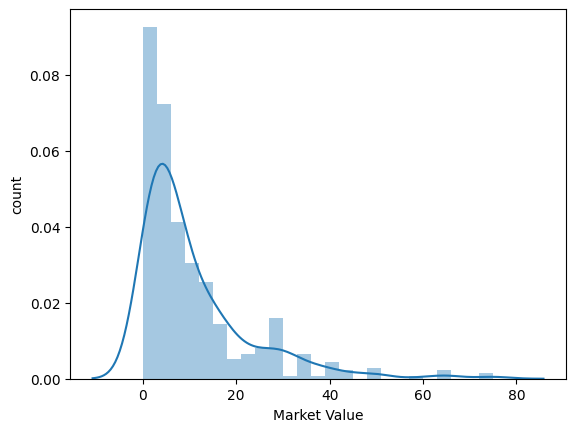

In [4]:
sns.distplot(fb.market_value)
plt.xlabel('Market Value')
plt.ylabel('count')
plt.show()

Clearly not a normal distribution, but this was expected. Teams tend to have few elite players, and a large number of low + mid value players in their squads. An analysis of a team’s 1st 15 would probably look more like a normal distribution, since we’d be excluding low value fringe / youth players.

### Distribution Of Popularity

Similar distribution to market value, except the presence of outliers as the popularity comes close to 8000

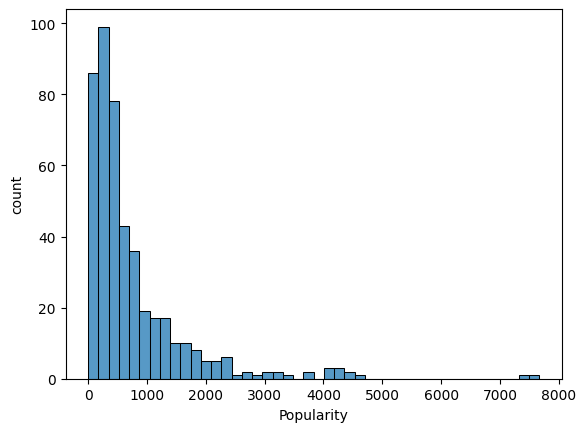

In [5]:
sns.histplot(fb.page_views)
plt.xlabel('Popularity')
plt.ylabel('count')
plt.show()

### FPL Valuation


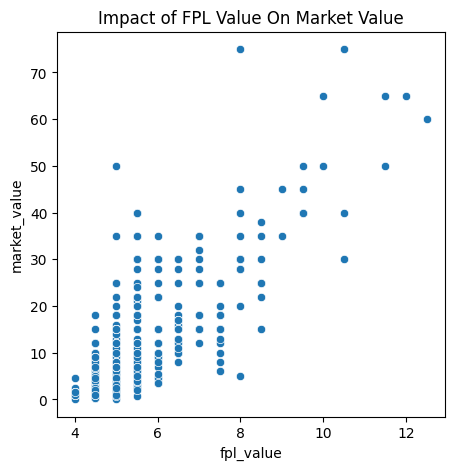

In [6]:
g = sns.scatterplot(x= fb.fpl_value,y = fb.market_value)

g.figure.set_size_inches(5,5)

plt.title("Impact of FPL Value On Market Value")
plt.show()

There seems to be nice agreement between the FPL value and market value, 
despite the fact that FPL valuation is decidedly shorter term, so age would be less of a factor. 

### Market Value with Age
It is fairly intuitive that older players will, on average, have lower market values. A rough illustration -

/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 37.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 53.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 68.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


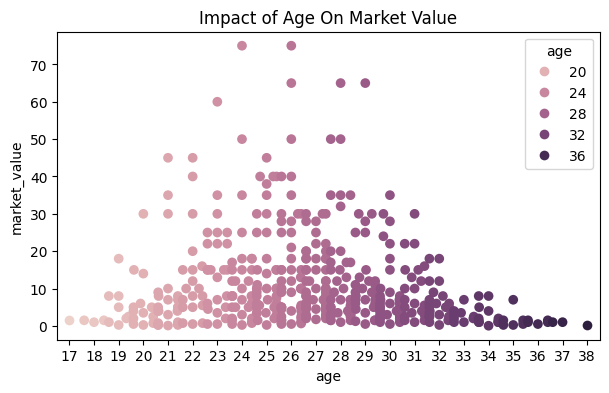

In [7]:

g = sns.swarmplot(x = "age",
              y= 'market_value', 
              data = fb,
              size = 7,
              hue="age", legend=True)

g.figure.set_size_inches(7,4)

plt.title("Impact of Age On Market Value")
plt.show()

### Relationship between Region and Market Value Dependence

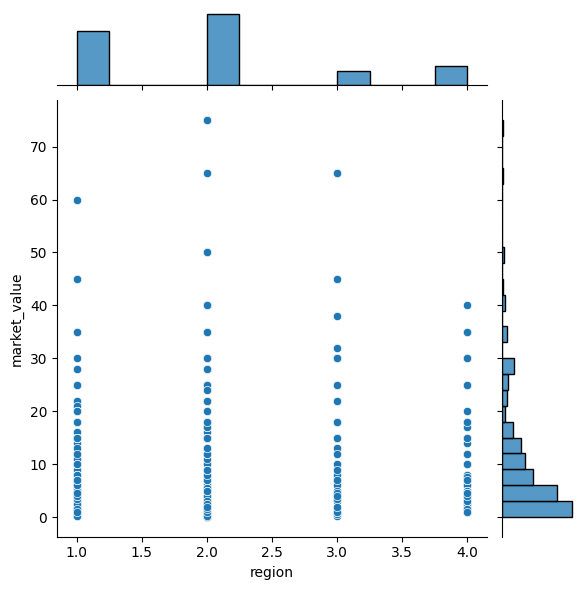

In [8]:
sns.jointplot( x= fb.region,y=fb.market_value,data=fb)
plt.show()

### Relationship between Player Position and market value


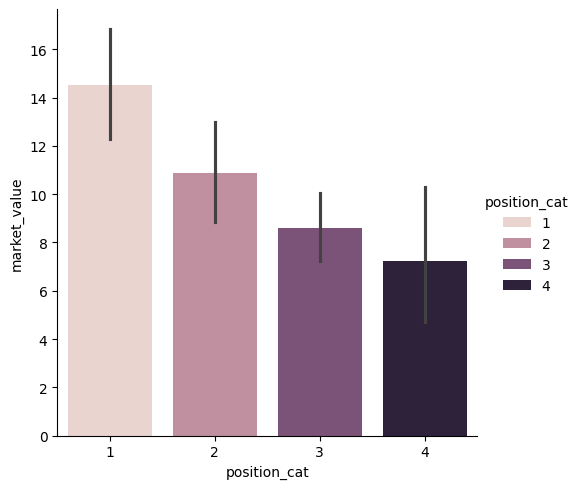

In [9]:
sns.catplot(x="position_cat", y="market_value", kind="bar", data=fb,hue="position_cat", legend=True)

#### Attackers and midfielders have higher values in market

### Region and Market Value Dependence

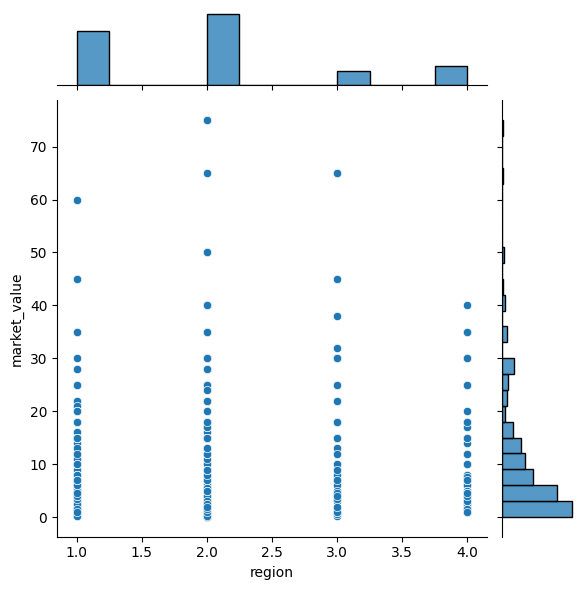

In [10]:
sns.jointplot(x=fb.region,y=fb.market_value)
plt.show()

### Market Value of Players from Big Clubs

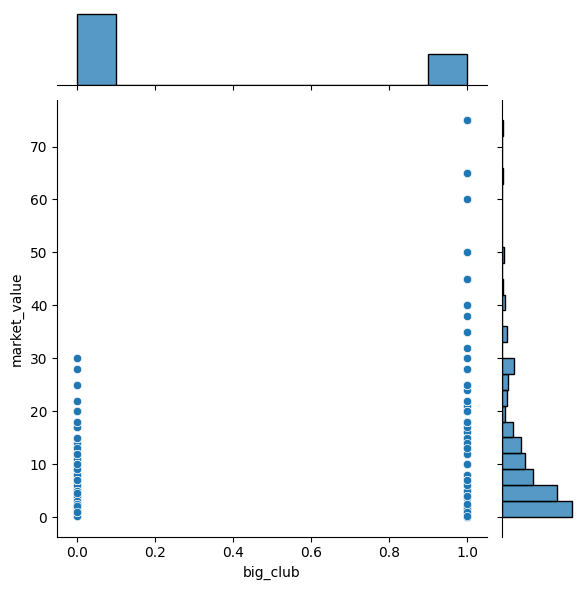

In [11]:
sns.jointplot(x=fb.big_club,y=fb.market_value)
plt.show()

### Top 5  Valuable Players based on market value

In [12]:
fb.nlargest(5,'market_value')

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
92,Eden Hazard,Chelsea,26,LW,1,75.0,4220,10.5,2.30%,224,2.0,Belgium,0,3,5,1,0
263,Paul Pogba,Manchester+United,24,CM,2,75.0,7435,8.0,19.50%,115,2.0,France,0,2,12,1,1
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
240,Kevin De Bruyne,Manchester+City,26,AM,1,65.0,2252,10.0,17.50%,199,2.0,Belgium,0,3,11,1,0
241,Sergio Aguero,Manchester+City,29,CF,1,65.0,4046,11.5,9.70%,175,3.0,Argentina,0,4,11,1,0


### Simple Correlation

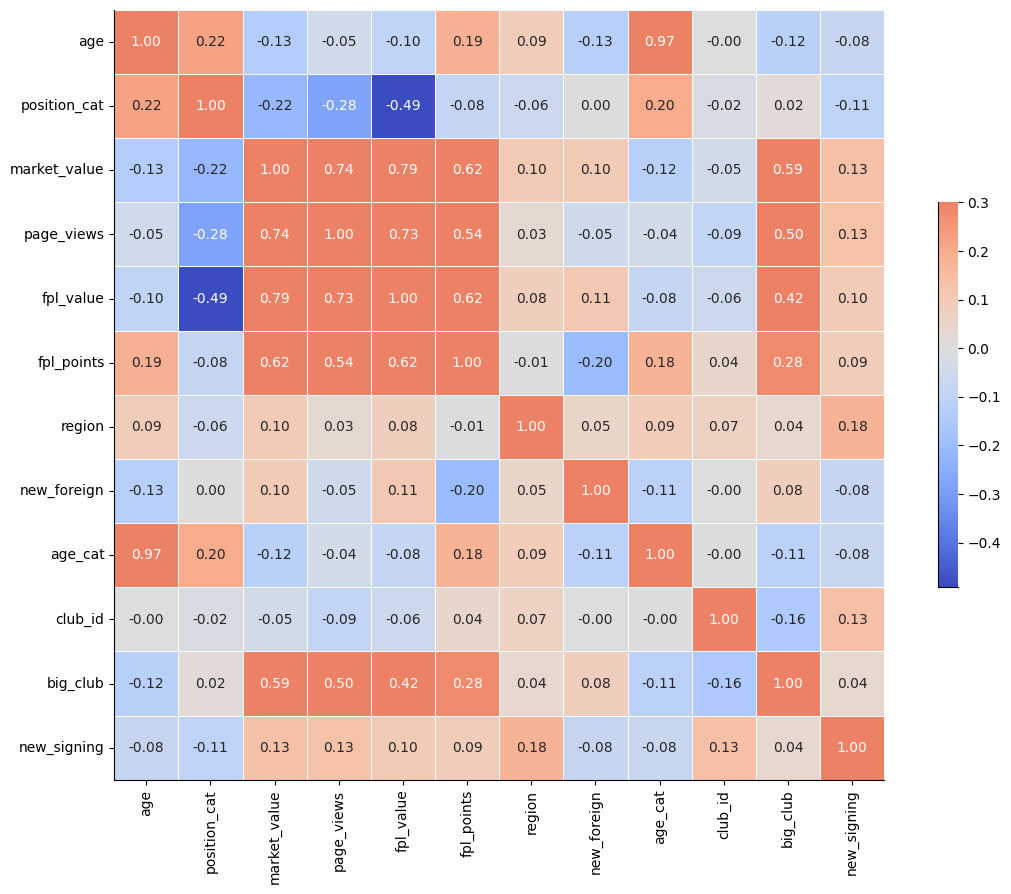

In [13]:

numeric_columns = fb.select_dtypes(include=['float64', 'int64'])

corr = numeric_columns.corr()


g = sns.heatmap(corr, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g.figure.set_size_inches(14,10)

plt.show()

As it can be implied from the heatmap easily, Market Vaue depends on various factors, namely
Page views, Fpl_value, Fpl_points (Pairplots shown below also depict this fact)

# Subset data and create Stacked Plot between club and nationality

In [14]:
fb.club.unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [15]:
fb.nationality.unique()

array(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Benin', 'Algeria', 'Jamaica',
       'Japan', 'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia',
       'Italy', 'Sweden', 'United States', 'Morocco', 'The Gambia',
       'Kenya', 'Greece', 'Uruguay', 'Romania', 'Venezuela',
       'New Zealand'], dtype=object)

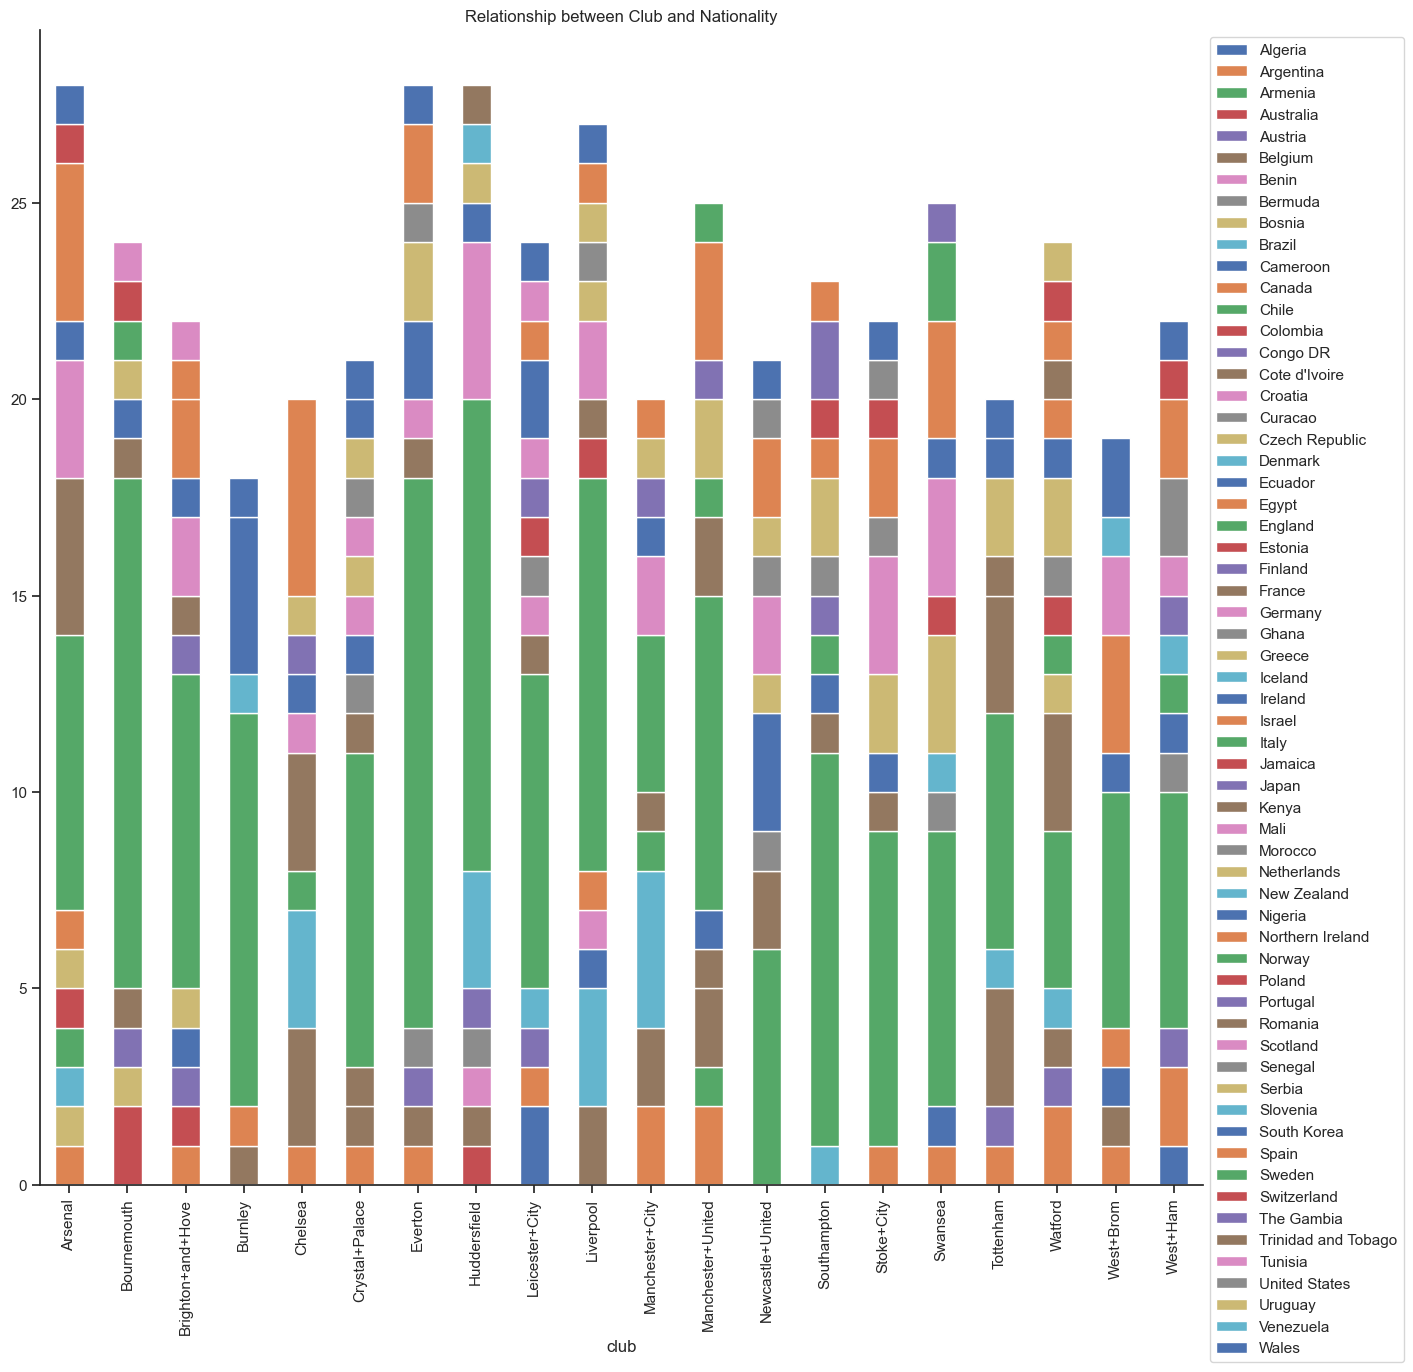

In [16]:
sns.set(style="ticks")

filtered_fb = fb[
    (fb['club'].isin(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham']) & 
                      (fb['nationality'].isin(['Chile', 'Germany', 'Czech Republic', 'England', 'France', 'Spain',
       'Nigeria', 'Switzerland', 'Wales', 'Brazil', 'Egypt', 'Argentina',
       'Colombia', 'Bosnia', 'Norway', 'Poland', 'Scotland', 'Congo DR',
       'Ireland', 'Netherlands', 'Australia', "Cote d'Ivoire", 'Finland',
       'Cameroon', 'Austria', 'Israel', 'Northern Ireland', 'Canada',
       'Belgium', 'Iceland', 'Serbia', 'Portugal', 'Ghana', 'South Korea',
       'Mali', 'Senegal', 'Curacao', 'Denmark', 'Slovenia',
       'Trinidad and Tobago', 'Bermuda', 'Benin', 'Algeria', 'Jamaica',
       'Japan', 'Tunisia', 'Croatia', 'Estonia', 'Ecuador', 'Armenia',
       'Italy', 'Sweden', 'United States', 'Morocco', 'The Gambia',
       'Kenya', 'Greece', 'Uruguay', 'Romania', 'Venezuela',
       'New Zealand'])))]

#print(filtered_fb)

df_plot=filtered_fb.groupby(['club', 'nationality']).size().reset_index().pivot(columns='club', index='nationality', values=0).reset_index()

g = df_plot.set_index('nationality').T.plot(kind='bar', stacked=True, color=sns.color_palette())
sns.despine()
g.figure.set_size_inches(15,15) 
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.title('Relationship between Club and Nationality')
plt.show()

# Pairplots

In [17]:
filtered_fb.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


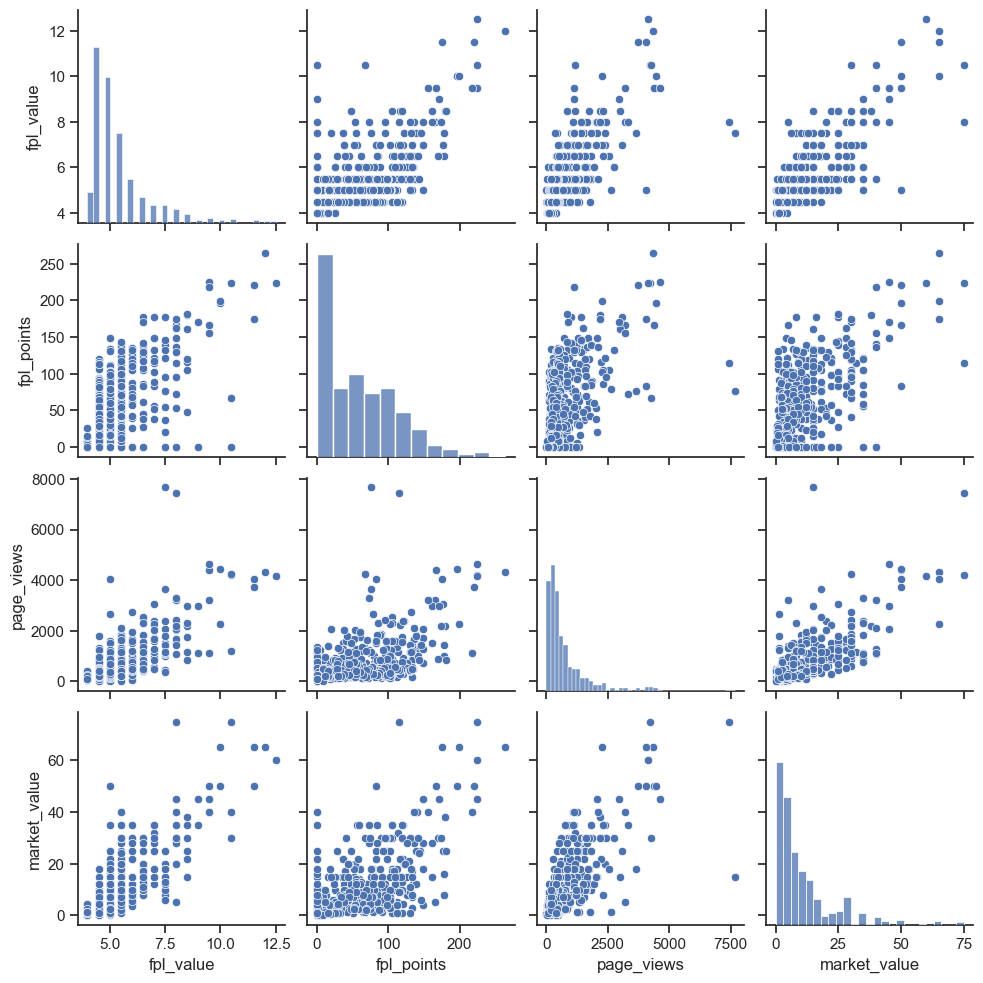

In [18]:
g = sns.pairplot(filtered_fb[['fpl_value','fpl_sel','fpl_points','page_views','market_value']])

/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 42.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 66.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 81.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/guneetkohli/anaconda3/envs/r-env/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 72.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


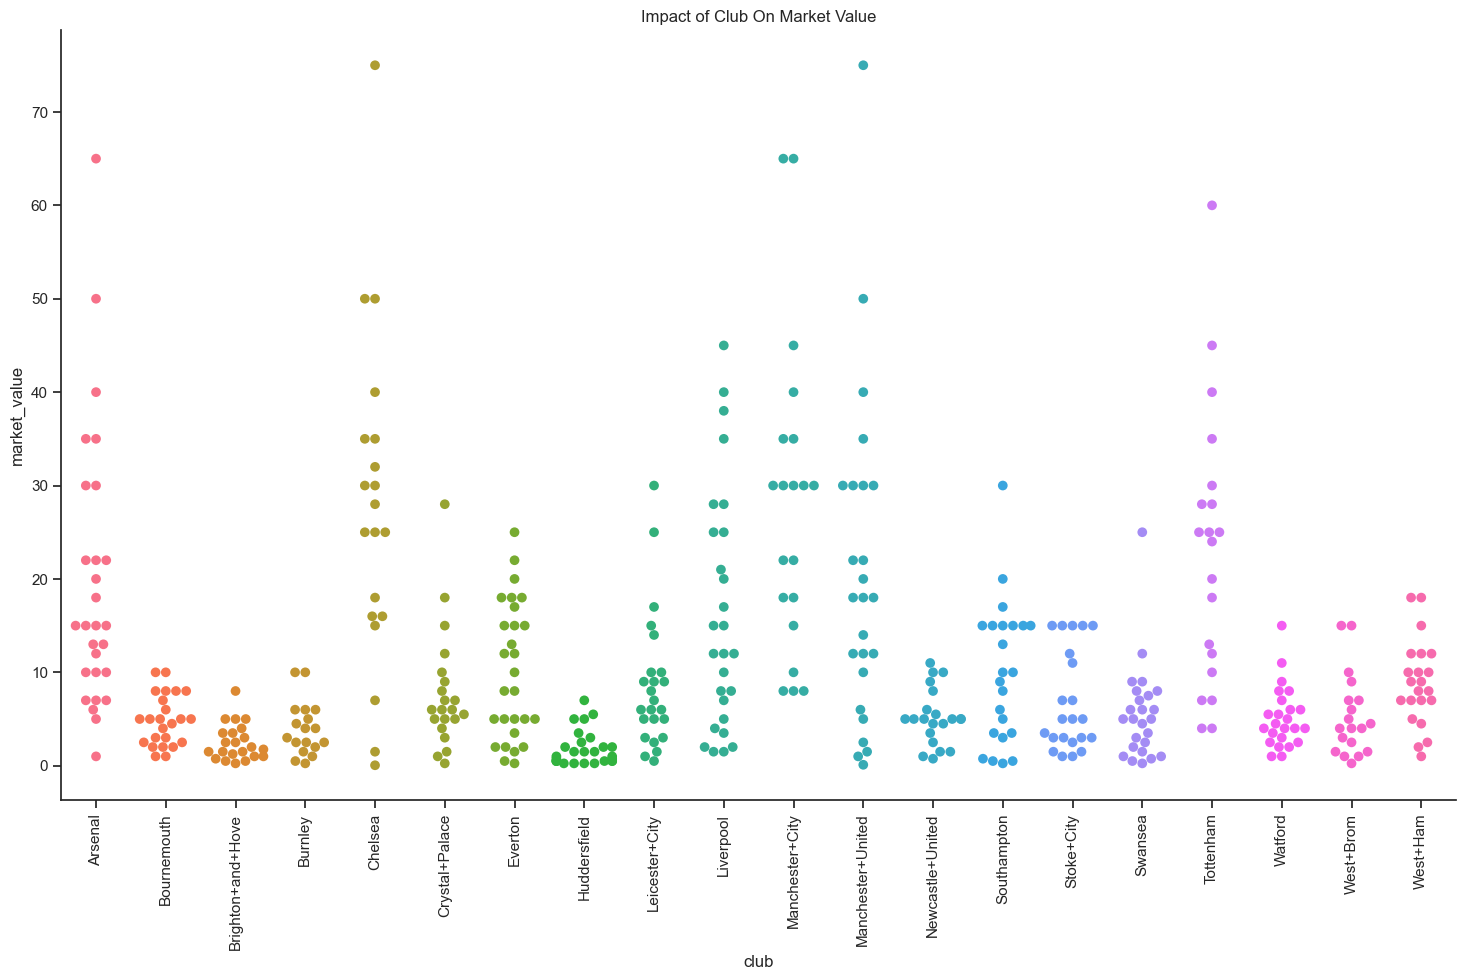

In [19]:
g = sns.swarmplot(x = "club",y= 'market_value', hue="club",data = filtered_fb, size = 7, alpha=1)
#g = sns.stripplot(x="club", y="market_value", hue="club", data=filtered_fb, jitter=True, dodge=True)

sns.despine()

# Set the figure size
g.figure.set_size_inches(18, 10)

# Rotate x-axis labels to prevent overlap
plt.xticks(rotation=90)

# Set the title of the plot
plt.title("Impact of Club On Market Value")

# Show the plot
plt.show()

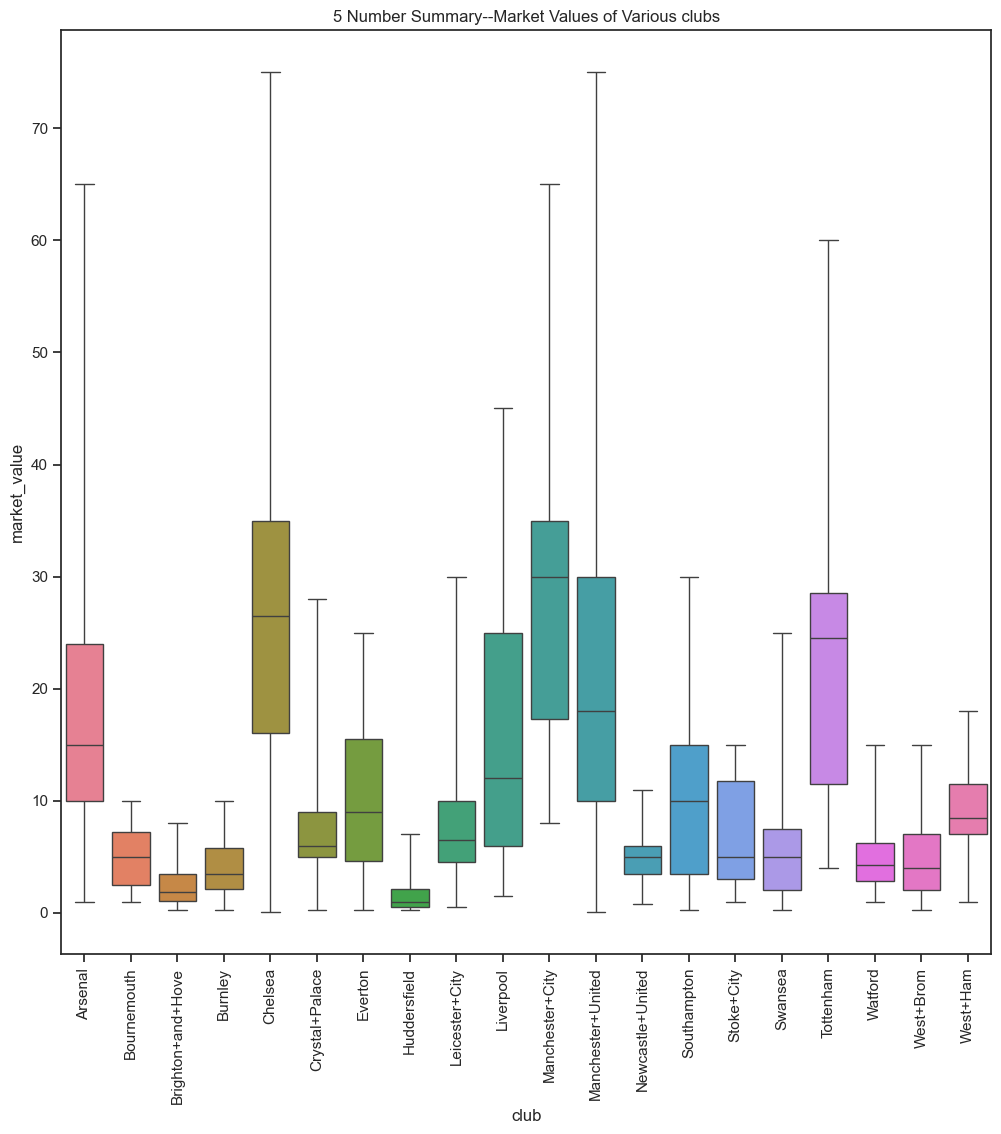

In [20]:
g = sns.boxplot(x = "club",
              y = 'market_value', hue="club",
              data = filtered_fb, whis=np.inf)

g.figure.set_size_inches(12,12)
plt.xticks(rotation=90)
plt.title("5 Number Summary--Market Values of Various clubs")
plt.show()

## Simple Correlation

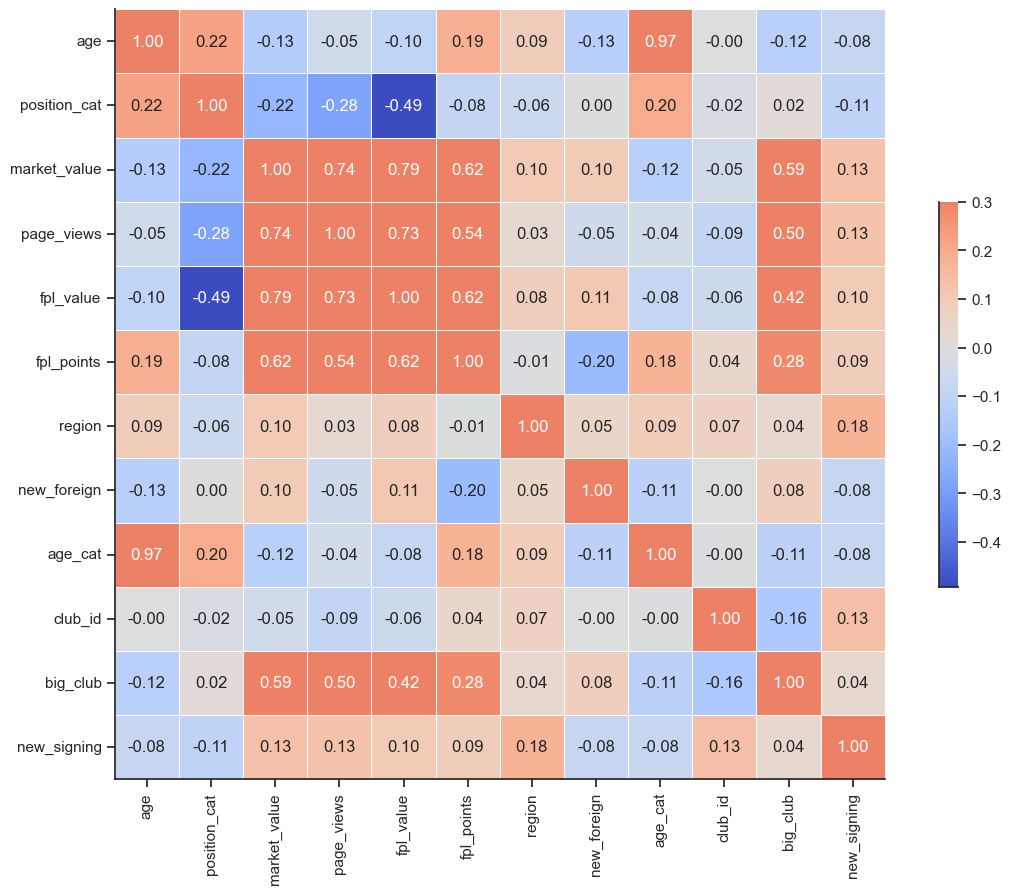

In [21]:
# Drop non-numeric columns
fb_numeric = fb.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = fb_numeric.corr()

# Plot heatmap
g = sns.heatmap(corr, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt='.2f', cmap='coolwarm')

sns.despine()
g.figure.set_size_inches(14,10)

plt.show()


# INSIGHTS


Factors that generate a higher market value are:
1. Attackers and Defenders
2. Players aged 22 to 28 
3. Page Views
4. European players 
5. higher fpl_values,higher fpl_points and more page_views

Another factor:
1. Mostly Armenians are part of different clubs
2. Market value generated by non big clubs is denser but the non big clubs generate highest market_value

In [22]:
fb.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


# Football Player Price Prediction

### LINEAR REGRESSION


As illustrated from the heatmap, one can see that Market Value and Fpl_Value have highest correlation, numerically, 0.79. 

Thus, Prioritizing fpl_value attribute to predict market_value

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, accuracy_score

### Normalizing the data

In [24]:
X = fb['fpl_value'].values
Y = fb['market_value'].values

After executing the cell below , the input features (X) and target variable (Y) will be scaled to the range [0, 1] and stored in the variables X and Y, respectively. These scaled features and target variable can then be used for training a machine learning model.

In [25]:
x_scaler = MinMaxScaler() #initializes a MinMaxScaler object for scaling the input features (X)
X = x_scaler.fit_transform(X.reshape(-1,1))
X = X[ : , -1]
y_scaler = MinMaxScaler()
Y = y_scaler.fit_transform(Y.reshape(-1,1))
Y = Y[ : , -1]

### Splitting the Data

In [26]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2)

### Error Function
Mean squared error (MSE) between the predicted values from a linear regression model and the target values. The MSE quantifies the overall fit of the model to the data, with lower values indicating better model performance.
- m: slope (rate of change of the dependent variable t with respect to changes in x)
- x: Independent variable or Input values ()
- c: constant term or the value of t when x is zero.
- t: Trying to predict this variable (Market Value)

In [27]:
def error(m, x, c, t):
    N = x.size
    e = sum(((m * x + c) - t)**2)
    return e * 1/(2 * N)

### Update Function
Used to update the parameters m (slope) and c (intercept) of a linear regression model using gradient descent.

In [28]:
def update(m, x, c, t, learning_rate):
    grad_m = sum(2*((m*x+c)-t)*x)
    grad_c = sum(2*((m*x+c)-t))
    m = m - grad_m * learning_rate
    c = c - grad_c * learning_rate
    return m,c

### Gradient Descent Function

In [29]:
def gradient_descent(init_m, init_c, x, t, learning_rate, iterations, error_threshold):
    m = init_m
    c = init_c
    error_values = []
    mc_values = []
    for i in range(iterations):
        e = error(m,x,c,t)
        if e < error_threshold:
            print("Error less than the threshold. Stopping the gradient descent.")
            break
        error_values.append(e)
        m,c = update(m,x,c,t,learning_rate)
        mc_values.append((m,c))
    return m, c, error_values, mc_values

In [30]:
init_m = 0.9
init_c = 0
learning_rate = 0.001
iterations = 250
error_threshold = 0.001
m, c, error_values, mc_values = gradient_descent(init_m, init_c, xtrain, ytrain, learning_rate, iterations, error_threshold)

### Visualization

In [31]:
mc_values_anim = mc_values[0:250:5]
#contains a subset of (m, c) tuples from the first 250 iterations of gradient descent, sampled at every 5th iteration. 
#This subset can be used to visualize the progression of parameter values during the optimization process.

In [32]:
def init():
    plt.scatter(xtest, ytest, color='g')
    ax.set_xlim(0, 1.0)
    ax.set_ylim(0, 1.0)
    return ln,

def update_frame(frame):
    m, c = mc_values_anim[frame]
    x1, y1 = -0.5, m * -.5 + c
    x2, y2 = 1.5, m * 1.5 + c
    ln.set_data([x1, x2], [y1, y2])
    return ln,

### Visualization of the learning process

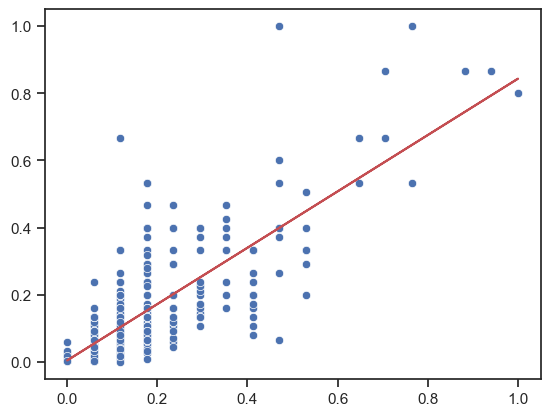

In [33]:
sns.scatterplot(x=xtrain, y=ytrain)
plt.plot(xtrain, (m * xtrain + c), color='r')

### Plotting Error Values

Text(0.5, 0, 'Iterations')

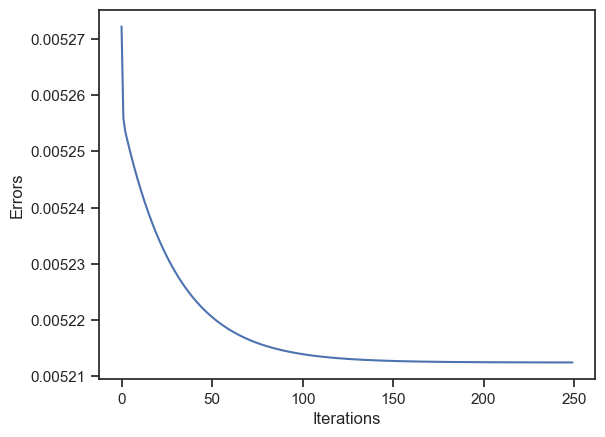

In [34]:
plt.plot(np.arange(len(error_values)), error_values)
plt.ylabel('Errors')
plt.xlabel('Iterations')

### Prediction

### Calculate the predictions

In [35]:
predicted = (m * xtest + c)

In [36]:
# Calculate MSE for the predicted value on the testing set
mean_squared_error(ytest, predicted)

0.00884064838100007

In [37]:
# Putting xtest, ytest and predicted values into a single DataFrame
p = pd.DataFrame(list(zip(xtest, ytest, predicted)), columns=['x', 'target_y', 'predicted_y'])
p.head()

,x,target_y,predicted_y
0,0.235294,0.199466,0.201960
1,0.058824,0.159440,0.053948
2,0.588235,0.466311,0.497985
3,0.235294,0.132755,0.201960
4,0.058824,0.032688,0.053948


### Reshape Normalization

In [38]:
predicted  = predicted.reshape(-1,1)
xtest  = xtest.reshape(-1,1)
ytest  = ytest.reshape(-1,1)

xtest_scaled = x_scaler.inverse_transform(xtest)
ytest_scaled = y_scaler.inverse_transform(ytest)
predicted_scaled = y_scaler.inverse_transform(predicted)

xtest_scaled = xtest_scaled[ : , -1]
ytest_scaled = ytest_scaled[ : , -1]
predicted_scaled = predicted_scaled[ : , -1]

p = pd.DataFrame(list(zip(xtest_scaled, ytest_scaled, predicted_scaled)), columns=['x', 'target_y', 'predicted_y'])
p = p.round(decimals = 2)
p.head(10)

,x,target_y,predicted_y
0,6.0,15.0,15.19
1,4.5,12.0,4.09
2,9.0,35.0,37.37
3,6.0,10.0,15.19
4,4.5,2.5,4.09
5,8.0,35.0,29.98
6,4.0,1.0,0.40
7,4.5,1.0,4.09
8,7.0,18.0,22.58
9,5.0,2.0,7.79


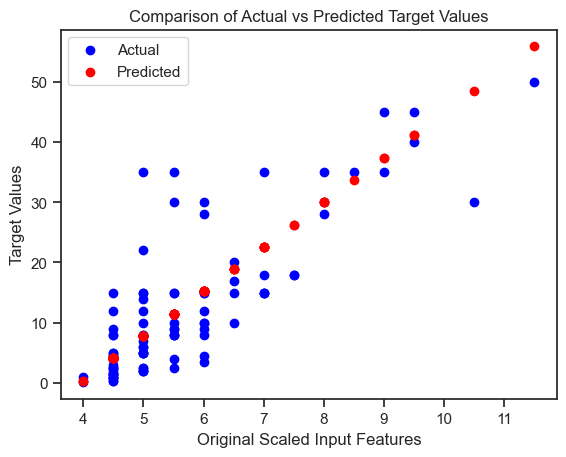

In [39]:
# Create a scatter plot for actual target values
plt.scatter(p['x'], p['target_y'], color='blue', label='Actual')

# Create a scatter plot for predicted target values
plt.scatter(p['x'], p['predicted_y'], color='red', label='Predicted')

# Add labels and title
plt.xlabel('Original Scaled Input Features')
plt.ylabel('Target Values')
plt.title('Comparison of Actual vs Predicted Target Values')
plt.legend()

# Show the plot
plt.show()
